In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [267]:
sales_train_df = pd.read_csv('./kaggle/sales_train.csv')
test_df = pd.read_csv('./kaggle/test.csv')
# item_categories = pd.read_csv('./kaggle/item_categories.csv')
# items = pd.read_csv('./kaggle/items.csv')
# shops = pd.read_csv('./kaggle/shops.csv')
# sample_submission = pd.read_csv('./kaggle/sample_submission.csv')
print('Number of Training Samples = {}'.format(sales_train_df.shape[0]))
print('Number of Test Samples = {}\n'.format(test_df.shape[0]))

print('Training X Shape = {}'.format(sales_train_df.shape))
print('Test X Shape = {}'.format(test_df.shape))
print('Test y Shape = {}\n'.format(test_df.shape[0]))

print('Index of Train set:\n', sales_train_df.columns)
print(sales_train_df.info())
print('\nIndex of Test set:\n', test_df.columns)


print('\nMissing values of Train set:\n', sales_train_df.isnull().sum())
print('\nNull values of Train set:\n', sales_train_df.isna().sum())

Number of Training Samples = 2935849
Number of Test Samples = 214200

Training X Shape = (2935849, 6)
Test X Shape = (214200, 3)
Test y Shape = 214200

Index of Train set:
 Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None

Index of Test set:
 Index(['ID', 'shop_id', 'item_id'], dtype='object')

Missing values of Train set:
 date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Null values of Train set:
 date              0
date_block_num

In [268]:
sales_train_df.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1918459,15.08.2014,19,24,806,249.0,1.0
2176208,08.11.2014,22,25,3424,1199.0,1.0
2881914,24.09.2015,32,25,20093,299.0,1.0
1676808,28.05.2014,16,57,17865,99.0,1.0
1343221,06.01.2014,12,7,6490,349.5,1.0
1399130,21.02.2014,13,14,1856,1249.5,1.0
2148452,03.11.2014,22,17,3329,1499.0,1.0
2423747,24.02.2015,25,31,14020,149.0,2.0
2395925,06.01.2015,24,59,5319,299.0,2.0
998930,08.10.2013,9,17,18877,199.0,1.0


In [282]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

sales_train_df = downcast_dtypes(sales_train_df)
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.000000,1.0
1,2013-01-03,0,25,2552,899.000000,1.0
2,2013-01-05,0,25,2552,899.000000,-1.0
3,2013-01-06,0,25,2554,1709.050049,1.0
4,2013-01-15,0,25,2555,1099.000000,1.0


In [270]:
sales_train_df['date'] = pd.to_datetime(sales_train_df['date'],format = '%d.%m.%Y')
print('Min date from train set: %s' % sales_train_df['date'].min().date())
print('Max date from train set: %s' % sales_train_df['date'].max().date())

Min date from train set: 2013-01-01
Max date from train set: 2015-10-31


In [243]:
# print min and max num assigned to the months
print('Min date_block_num from train set: %s' % sales_train_df['date_block_num'].min())
print('Max date_block_num from train set: %s' % sales_train_df['date_block_num'].max())

Min date_block_num from train set: 0
Max date_block_num from train set: 33


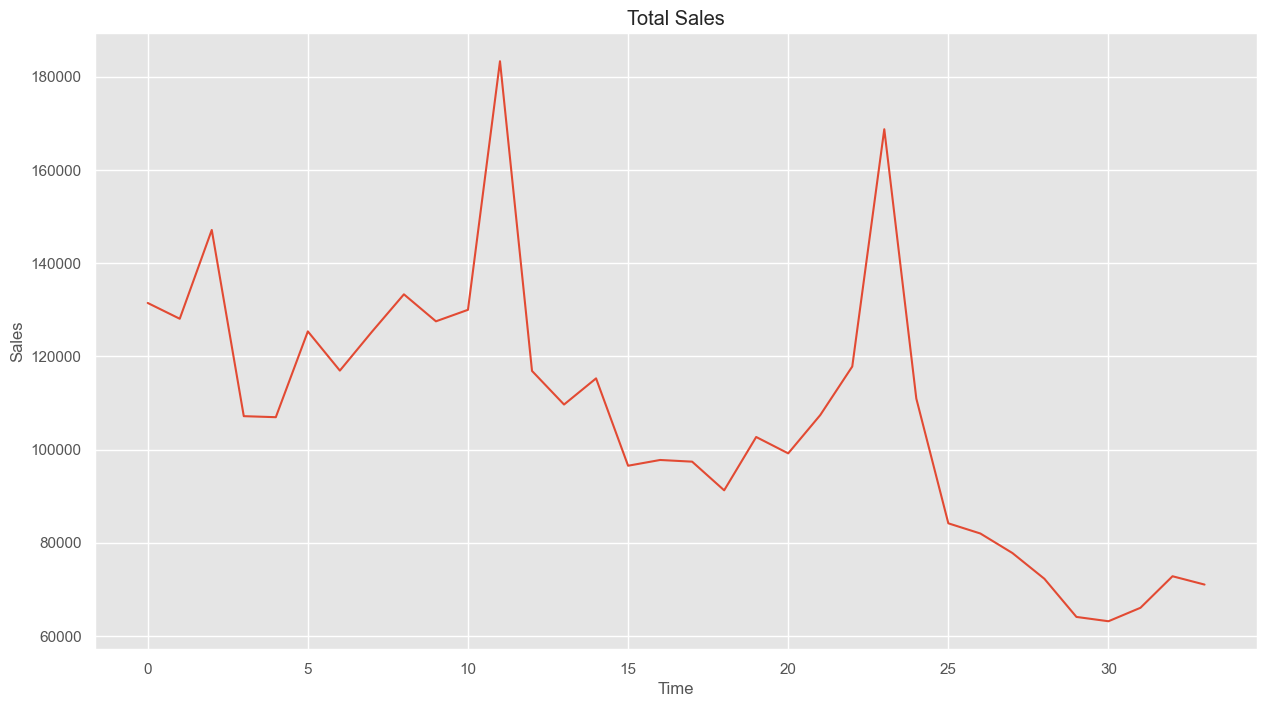

In [244]:
ts=sales_train_df.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(15,8))
plt.title('Total Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)

Sale volume outliers: [20949 11373]
Item price outliers: [6066]


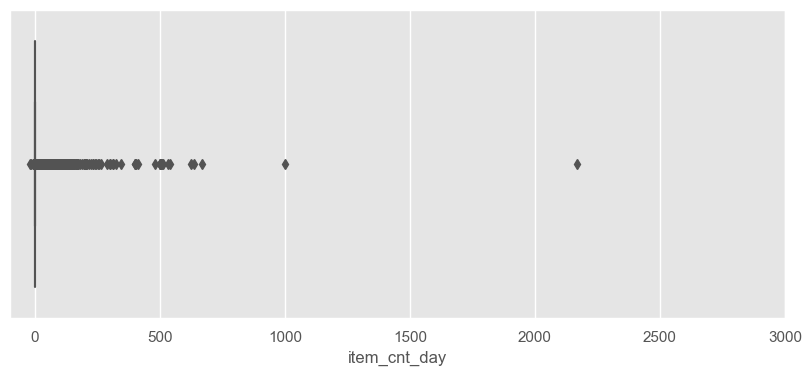

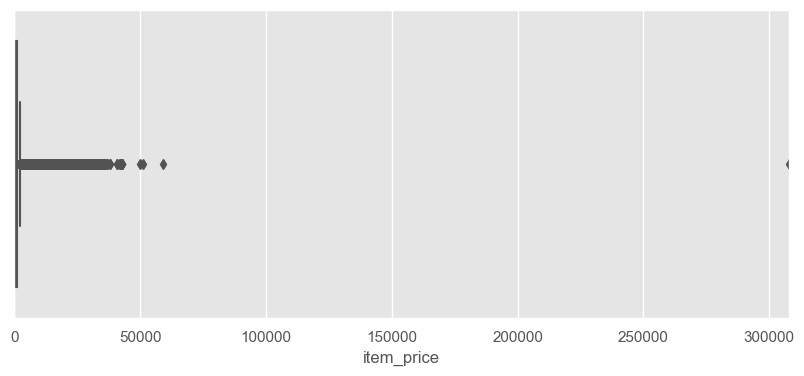

In [245]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sb.boxplot(x=sales_train_df['item_cnt_day'])
print('Sale volume outliers:',sales_train_df['item_id'][sales_train_df['item_cnt_day']>900].unique())

plt.figure(figsize=(10,4))
plt.xlim(sales_train_df['item_price'].min(), sales_train_df['item_price'].max())
sb.boxplot(x=sales_train_df['item_price'])
print('Item price outliers:',sales_train_df['item_id'][sales_train_df['item_price']>300000].unique())

In [284]:
sales_train_df = sales_train_df[(sales_train_df.item_price < 300000 ) & (sales_train_df.item_cnt_day < 900)]
sales_train_df.shape


(2935846, 6)

In [285]:
#create a pivot table from train_sales
train_data = sales_train_df.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
# reset indices for easy manipulation
train_data.reset_index(inplace = True)
train_data.shape

(424123, 36)

In [287]:
test_df.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [286]:
# merge train_data and test_df as to be suitable for prediction
all_data = pd.merge(test_df,train_data,on = ['item_id','shop_id'],how = 'left')
all_data.head(10)

/var/folders/gx/mwghkzgj4mx14pnn9jrnjqym0000gn/T/ipykernel_3963/2652859555.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  all_data = pd.merge(test_df,train_data,on = ['item_id','shop_id'],how = 'left')
/var/folders/gx/mwghkzgj4mx14pnn9jrnjqym0000gn/T/ipykernel_3963/2652859555.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_data = pd.merge(test_df,train_data,on = ['item_id','shop_id'],how = 'left')


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,5039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
6,6,5,5041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
7,7,5,5046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,8,5,5319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,3.0,0.0
9,9,5,5003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
# fill all NaN values with 0
all_data.fillna(0,inplace = True)
# display
all_data.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop columns ID, shop_id, and item_id that are not sequence of observation over a time period. Retain only observations that can be used in creating time series lag features, i.e. features at previous levels to help predicting outcome at a future time.

In [276]:
all_data.drop(['ID','shop_id','item_id'],inplace = True, axis = 1)
all_data.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Data Preparation</b><br>
Transform time series data to fit a supervised learning model, a model must learn from a series of past observation in order to predict the next sequence.The challenge is a multivariate time series with multiple parrallel input time series where the output is dependent on the input series. The sequence of observations will be transformed into multiple subsamples with rows for time steps and one series per column into the input/output pairs suitable for processing.

In [277]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [281]:
# create dummy samples
dummy_samples = [[0] * 34] * 2
# rename all_data columns to match dummy_samples dataframe
all_data.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
# create dummy_samples dataframe and concatenate with all_data
all_data = pd.concat([pd.DataFrame(dummy_samples), all_data], ignore_index=True)
# print shape of all_data
all_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0


In [280]:
# keep all columns execpt the last two 
train_data = np.expand_dims(all_data.values[:,:-2],axis = 2)
# keep all columns execpt the first and last
validation_data = np.expand_dims(all_data.values[:,1:-1],axis = 2)
# keep all columns execpt the first two
test_data = np.expand_dims(all_data.values[:,2:],axis = 2)
# print the shapes 
print(train_data.shape, validation_data.shape, test_data.shape)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [3.]
  [1.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [256]:
from numpy import array
# choose a number of time steps
n_steps = 3
# convert into input/output
X_train, y = split_sequences(train_data, n_steps)
X_val, y_val = split_sequences(validation_data, n_steps)
X_test, y_test = split_sequences(test_data, n_steps)
print(X_train.shape, y.shape)

(214200, 3, 31, 1) (214200, 1)


In [257]:
X = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_train.shape[1], X_train.shape[2]))

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import  tensorflow.keras.optimizers as optimizers
# number of features
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(64, activation= 'relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True,  input_shape=(n_steps, n_features)))
model.add(LSTM(64, activation= 'relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(optimizer=optimizers.Adam(lr=.0001), loss= 'mse', metrics = ['mean_squared_error'])     
model.summary()

2022-11-28 19:19:59.069975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 64)             24576     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 57,665
Trainable params: 57,665
Non-trainable params: 0
_________________________________________________________________


In [259]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.25, patience=2, min_lr=0.000001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [260]:
model.fit(X, y, epochs=15, callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/15
6691/6694 [============================>.] - ETA: 0s - loss: 2.1003 - mean_squared_error: 2.1003
Epoch 1: val_loss improved from inf to 2.24343, saving model to model.h5
6694/6694 [==============================] - 70s 9ms/step - loss: 2.0996 - mean_squared_error: 2.0996 - val_loss: 2.2434 - val_mean_squared_error: 2.2434 - lr: 0.0010
Epoch 2/15
6692/6694 [============================>.] - ETA: 0s - loss: 2.0503 - mean_squared_error: 2.0503
Epoch 2: val_loss did not improve from 2.24343
6694/6694 [==============================] - 50s 8ms/step - loss: 2.0499 - mean_squared_error: 2.0499 - val_loss: 2.4690 - val_mean_squared_error: 2.4690 - lr: 0.0010
Epoch 3/15
6693/6694 [============================>.] - ETA: 0s - loss: 2.1968 - mean_squared_error: 2.1968
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 3: val_loss did not improve from 2.24343
6694/6694 [==============================] - 48s 7ms/step - loss: 2.1967 - mean_squared_error: 2.1

In [261]:
# create submission file 
submit = model.predict(X_test)
# clip between 0 and 20
submit = submit.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_df['ID'],'item_cnt_month':submit.ravel()})
# creating csv file from dataframe
submission.to_csv('submit2a.csv',index = False)

6694/6694 [==============================] - 15s 2ms/step


In [262]:
submission.head(10)

,ID,item_cnt_month
0,0,1.173705
1,1,0.224845
2,2,1.516341
3,3,0.410492
4,4,0.096057
5,5,0.402321
6,6,1.126149
7,7,0.172086
8,8,2.802515
9,9,0.522138
